In [1]:
from sklearn.datasets import load_iris
import pandas as pd
iris=load_iris()

In [2]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [3]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [5]:
df=pd.DataFrame(iris.data,columns=iris.feature_names)
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [6]:
df['target']=iris.target

In [7]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [9]:
df[df.target==1].head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
50,7.0,3.2,4.7,1.4,1
51,6.4,3.2,4.5,1.5,1
52,6.9,3.1,4.9,1.5,1
53,5.5,2.3,4.0,1.3,1
54,6.5,2.8,4.6,1.5,1


In [11]:
df['flower_name']=df.target.apply(lambda x: iris.target_names[x] )
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,flower_name
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa


In [12]:
df[45:55]

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,flower_name
45,4.8,3.0,1.4,0.3,0,setosa
46,5.1,3.8,1.6,0.2,0,setosa
47,4.6,3.2,1.4,0.2,0,setosa
48,5.3,3.7,1.5,0.2,0,setosa
49,5.0,3.3,1.4,0.2,0,setosa
50,7.0,3.2,4.7,1.4,1,versicolor
51,6.4,3.2,4.5,1.5,1,versicolor
52,6.9,3.1,4.9,1.5,1,versicolor
53,5.5,2.3,4.0,1.3,1,versicolor
54,6.5,2.8,4.6,1.5,1,versicolor


In [14]:
df0=df[:50]
df1=df[50:100]
df2=df[100:]

In [15]:
import matplotlib.pyplot as plt
%matplotlib inline

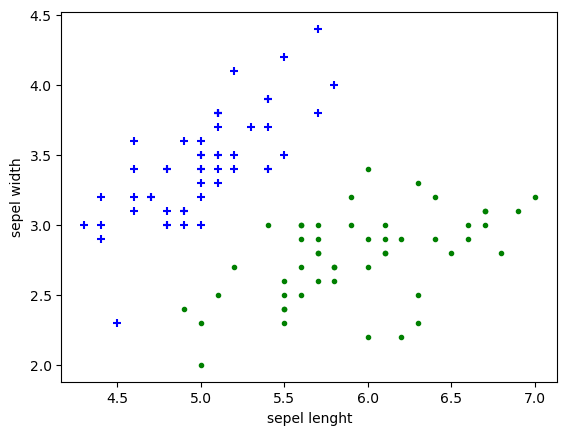

In [17]:
plt.xlabel('sepel lenght')
plt.ylabel('sepel width')
plt.scatter(df0['sepal length (cm)'],df0['sepal width (cm)'],color= 'blue',marker='+')
plt.scatter(df1['sepal length (cm)'],df1['sepal width (cm)'],color= 'green' ,marker='.')

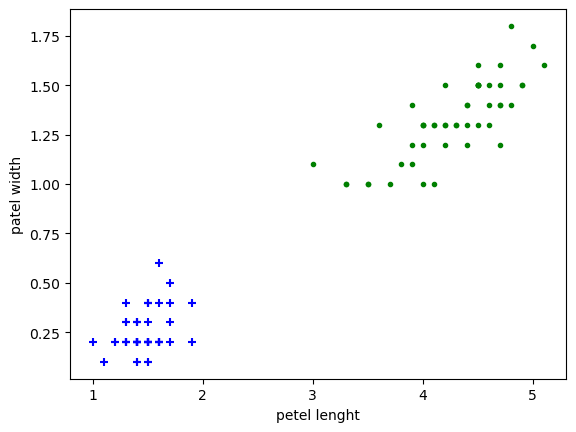

In [18]:
plt.xlabel('petel lenght')
plt.ylabel('patel width')
plt.scatter(df0['petal length (cm)'],df0['petal width (cm)'],color= 'blue',marker='+')
plt.scatter(df1['petal length (cm)'],df1['petal width (cm)'],color= 'green' ,marker='.')

In [21]:
from sklearn.model_selection import train_test_split
X=df.drop(['target','flower_name'],axis='columns')
Y=df.target

In [22]:
xtrain,xtest,ytrain,ytest=train_test_split(X,Y,test_size=0.2,random_state=1)

In [23]:
len(xtrain)

120

In [24]:
len(xtest)

30

# create KNN

In [26]:
from sklearn.neighbors import KNeighborsClassifier

In [27]:
knn=KNeighborsClassifier(n_neighbors=3)

In [28]:
knn.fit(xtrain,ytrain)

KNeighborsClassifier(n_neighbors=3)

In [29]:
knn.score(xtest,ytest)

1.0

In [36]:
from sklearn.metrics import confusion_matrix
y_predicted=knn.predict(xtest)
cm=confusion_matrix(ytest,y_predicted)
cm

array([[11,  0,  0],
       [ 0, 13,  0],
       [ 0,  0,  6]], dtype=int64)

Text(70.72222222222221, 0.5, 'truth')

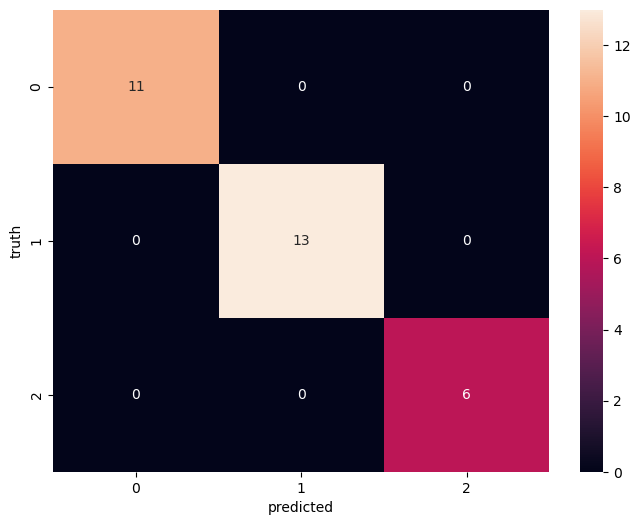

In [37]:
import seaborn as sn
plt.figure(figsize=(8,6))
sn.heatmap(cm,annot=True)
plt.xlabel("predicted")
plt.ylabel('truth')